# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [9]:
from __future__ import print_function

# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [10]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [14]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [15]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

Here we have:
$$h_1 = XW_1 + b_1$$
$$s_1 = max(0, h_1)$$
$$score = s_1W_2 + b_2$$
The derivative of score $\delta_{score} = dL/dscore$ is same as softmax.py Here we didn't consider the regularization.
$$\delta_{s_1} = \delta_{score}W_2^T$$
$$\delta_{h_1} = \delta_{s_1}\times ds_1/dh_1 = (\delta_{s_1} ,h_1 > 0) = (0, h_1 <= 0)$$
$$dL/dW_1 = X^T\delta_{h_1}$$
$$dL/db_1 = \delta_{h_1}$$
Moreover
$$dL/db_{2i} = (P_i-1\ i=label) = (P_i\ else)$$

In [16]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 1.555470e-09
b2 max relative error: 3.865091e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


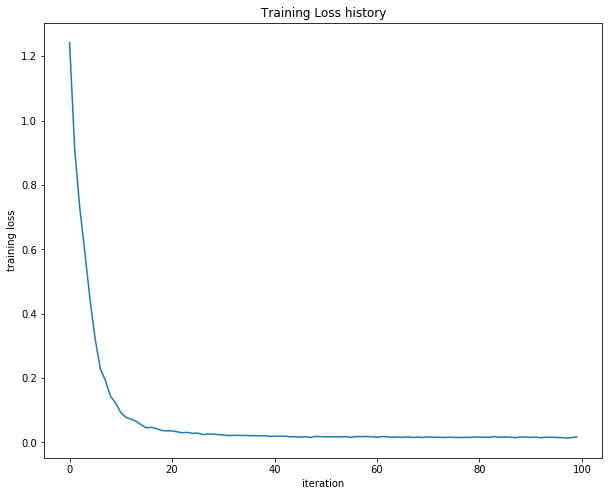

In [19]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [20]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [33]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302976
iteration 100 / 1000: loss 2.302531
iteration 200 / 1000: loss 2.298530
iteration 300 / 1000: loss 2.257940
iteration 400 / 1000: loss 2.167034
iteration 500 / 1000: loss 2.135832
iteration 600 / 1000: loss 2.107252
iteration 700 / 1000: loss 2.046747
iteration 800 / 1000: loss 2.037491
iteration 900 / 1000: loss 1.935445
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

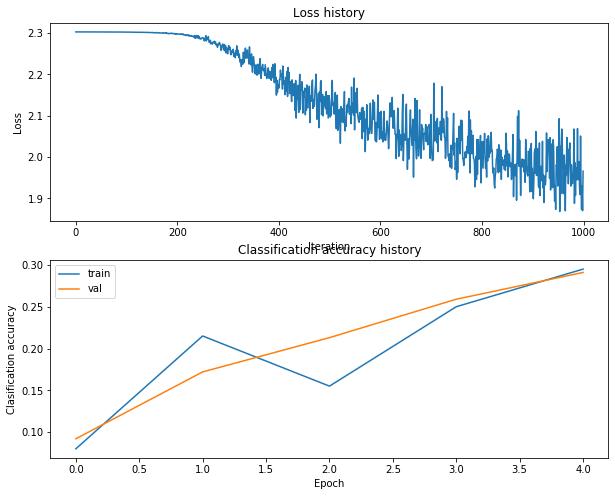

In [34]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

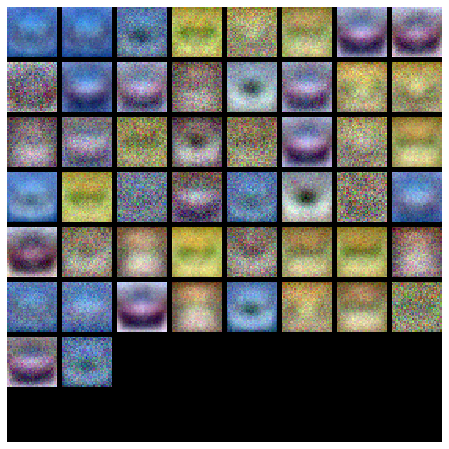

In [35]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [25]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
#Define the best validation accuracy, learning rate, hidden layer size, regularization.
bv_acc = 0
b_lr   = 0
b_hs   = 0
b_r    = 0
b_net  = None
b_stats = []

#Generate the hyperparameter
def hyper_gen():
    lr = [0.001+i*0.001 for i in range(5)]
    hs = [50+i*20 for i in range(6)]
    reg= [0.2+i*0.15 for i in range(5)]
    return lr, hs, reg
lr, hs, reg = hyper_gen()

#Find the best hyperparameter
count = 0
for lr_i in lr:
    for hs_i in hs:
        for reg_i in reg:
            net = TwoLayerNet(input_size, hs_i, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val, num_iters=2000, batch_size=200, learning_rate=lr_i, learning_rate_decay=0.95,
                             reg=reg_i, verbose=False)
            t_acc = np.mean(net.predict(X_train) == y_train)
            v_acc = np.mean(net.predict(X_val) == y_val)
            if v_acc > bv_acc:
                bv_acc = v_acc
                b_net  = net
                b_stats= stats
                b_lr   = lr_i
                b_hs   = hs_i
                b_r    = reg_i
            count += 1
            print()
            print("Try", count,": lr:%f,hs:%d,reg:%f, v_acc:%f"%(lr_i, hs_i, reg_i, v_acc))
print("Best model:")
print("lr:%f,hs:%d,reg:%f, v_acc%f"%(b_lr, b_hs, b_r,bv_acc))

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################


Try 1 : lr:0.001000,hs:50,reg:0.200000, v_acc0.483000

Try 2 : lr:0.001000,hs:50,reg:0.350000, v_acc0.495000

Try 3 : lr:0.001000,hs:50,reg:0.500000, v_acc0.482000

Try 4 : lr:0.001000,hs:50,reg:0.650000, v_acc0.484000

Try 5 : lr:0.001000,hs:50,reg:0.800000, v_acc0.489000

Try 6 : lr:0.001000,hs:70,reg:0.200000, v_acc0.511000

Try 7 : lr:0.001000,hs:70,reg:0.350000, v_acc0.477000

Try 8 : lr:0.001000,hs:70,reg:0.500000, v_acc0.501000

Try 9 : lr:0.001000,hs:70,reg:0.650000, v_acc0.490000

Try 10 : lr:0.001000,hs:70,reg:0.800000, v_acc0.489000

Try 11 : lr:0.001000,hs:90,reg:0.200000, v_acc0.508000

Try 12 : lr:0.001000,hs:90,reg:0.350000, v_acc0.505000

Try 13 : lr:0.001000,hs:90,reg:0.500000, v_acc0.487000

Try 14 : lr:0.001000,hs:90,reg:0.650000, v_acc0.491000

Try 15 : lr:0.001000,hs:90,reg:0.800000, v_acc0.486000

Try 16 : lr:0.001000,hs:110,reg:0.200000, v_acc0.523000

Try 17 : lr:0.001000,hs:110,reg:0.350000, v_acc0.491000

Try 18 : lr:0.001000,hs:110,reg:0.500000, v_acc0.50300

C:\Users\eddie\hw1-caiJiYiMei-master\hw1-caiJiYiMei-master\PartB-coding\cs231n\classifiers\neural_net.py:111: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(prob[range(N), list(y)]))/N + reg*(np.sum(W1*W1) + np.sum(W2*W2))



Try 91 : lr:0.004000,hs:50,reg:0.200000, v_acc0.177000

Try 92 : lr:0.004000,hs:50,reg:0.350000, v_acc0.409000

Try 93 : lr:0.004000,hs:50,reg:0.500000, v_acc0.447000

Try 94 : lr:0.004000,hs:50,reg:0.650000, v_acc0.459000

Try 95 : lr:0.004000,hs:50,reg:0.800000, v_acc0.106000

Try 96 : lr:0.004000,hs:70,reg:0.200000, v_acc0.149000

Try 97 : lr:0.004000,hs:70,reg:0.350000, v_acc0.161000

Try 98 : lr:0.004000,hs:70,reg:0.500000, v_acc0.466000

Try 99 : lr:0.004000,hs:70,reg:0.650000, v_acc0.377000

Try 100 : lr:0.004000,hs:70,reg:0.800000, v_acc0.384000

Try 101 : lr:0.004000,hs:90,reg:0.200000, v_acc0.153000

Try 102 : lr:0.004000,hs:90,reg:0.350000, v_acc0.143000

Try 103 : lr:0.004000,hs:90,reg:0.500000, v_acc0.177000

Try 104 : lr:0.004000,hs:90,reg:0.650000, v_acc0.455000

Try 105 : lr:0.004000,hs:90,reg:0.800000, v_acc0.167000

Try 106 : lr:0.004000,hs:110,reg:0.200000, v_acc0.184000

Try 107 : lr:0.004000,hs:110,reg:0.350000, v_acc0.151000

Try 108 : lr:0.004000,hs:110,reg:0.50

C:\Users\eddie\hw1-caiJiYiMei-master\hw1-caiJiYiMei-master\PartB-coding\cs231n\classifiers\neural_net.py:109: RuntimeWarning: overflow encountered in subtract
  score_stable = np.exp(scores - np.max(scores, axis=1).reshape(-1, 1))
C:\Users\eddie\hw1-caiJiYiMei-master\hw1-caiJiYiMei-master\PartB-coding\cs231n\classifiers\neural_net.py:109: RuntimeWarning: invalid value encountered in subtract
  score_stable = np.exp(scores - np.max(scores, axis=1).reshape(-1, 1))
C:\Users\eddie\hw1-caiJiYiMei-master\hw1-caiJiYiMei-master\PartB-coding\cs231n\classifiers\neural_net.py:136: RuntimeWarning: invalid value encountered in greater
  dh1 = ds1*(h1>0)



Try 121 : lr:0.005000,hs:50,reg:0.200000, v_acc0.087000

Try 122 : lr:0.005000,hs:50,reg:0.350000, v_acc0.087000

Try 123 : lr:0.005000,hs:50,reg:0.500000, v_acc0.087000

Try 124 : lr:0.005000,hs:50,reg:0.650000, v_acc0.087000

Try 125 : lr:0.005000,hs:50,reg:0.800000, v_acc0.087000

Try 126 : lr:0.005000,hs:70,reg:0.200000, v_acc0.087000

Try 127 : lr:0.005000,hs:70,reg:0.350000, v_acc0.087000

Try 128 : lr:0.005000,hs:70,reg:0.500000, v_acc0.087000

Try 129 : lr:0.005000,hs:70,reg:0.650000, v_acc0.087000

Try 130 : lr:0.005000,hs:70,reg:0.800000, v_acc0.087000

Try 131 : lr:0.005000,hs:90,reg:0.200000, v_acc0.087000

Try 132 : lr:0.005000,hs:90,reg:0.350000, v_acc0.087000

Try 133 : lr:0.005000,hs:90,reg:0.500000, v_acc0.087000

Try 134 : lr:0.005000,hs:90,reg:0.650000, v_acc0.087000

Try 135 : lr:0.005000,hs:90,reg:0.800000, v_acc0.087000

Try 136 : lr:0.005000,hs:110,reg:0.200000, v_acc0.087000

Try 137 : lr:0.005000,hs:110,reg:0.350000, v_acc0.087000

Try 138 : lr:0.005000,hs:110

In [26]:
print("Best model:")
print("lr:%f,hs:%d,reg:%f, v_acc%f"%(b_lr, b_hs, b_r,bv_acc))


Best model:
lr:0.001000,hs:130,reg:0.200000, v_acc0.526000


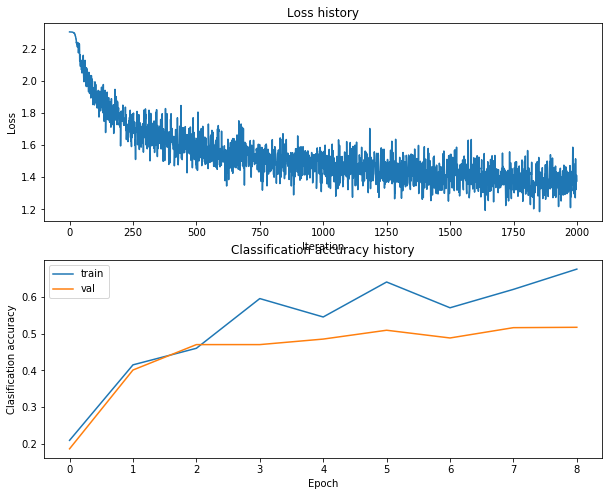

In [27]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(b_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(b_stats['train_acc_history'], label='train')
plt.plot(b_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

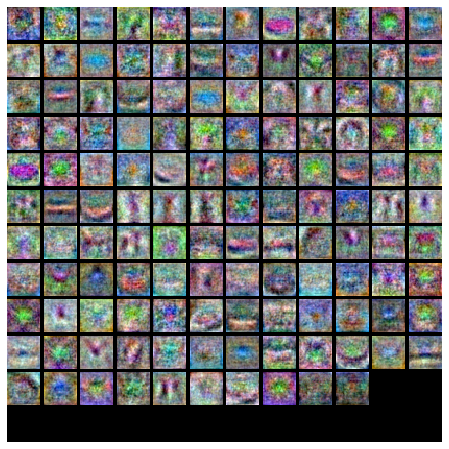

In [30]:
# visualize the weights of the best network
show_net_weights(b_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [32]:
test_acc = (b_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.526


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: [1],[3]

*Your explanation:*

This phenomenon happen is because the model overfits the data.

1. This is ture, since training on larger dataset prevents overfitting, adding variation of each classes' images can help a lot. 

2. This is False, since the training accuracy is already much higher than testing accuracy, which means the model it too complex, add more hidden units can lead a worse model.Since the model just momorizes the training data, not learning it.

3. This is true, since adding the regularization strength can avoid overfitting, the regularization term will force the weight to be small or zero, which lower the model complexity thus avoid overfitting.